<a href="https://colab.research.google.com/github/uzdanska/Machine-Learning/blob/main/supervised/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn

Strona biblioteki: https://scikit-learn.org

Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn

```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```

### Spis treści:

1.   [Import bibliotek](#0)
2.   [Polynomial Regression - Regresja](#1)
3.   [Wygenerowanie danych](#2)
4.   [Model liniowy](#3)
5.   [Ekstrakcja cech wielomianowych - stopień 2](#4)
6.   [Dopasowanie modelu](#5)
7.   [Ekstrakcja cech wielomianowych - stopień 3](#6)
8.   [Dopasowanie modelu](#7)
9.   [Ekstrakcja cech wielomianowych - stopień 4](#8)
10.   [Dopasowanie modelu](#9)
11.   [Porównanie metryk](#10)

### <a name="0"></a> 1. Import bibliotek



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.2.2'

### <a name="1"></a> 2. Polynomial Regression - Regresja

Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik.

## Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$

### <a name="2"></a> 3. Wygenerowanie danych


In [12]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 -2*X + 3 + noise
X = X.reshape(40, 1)
X

array([[-10. ],
       [ -9.5],
       [ -9. ],
       [ -8.5],
       [ -8. ],
       [ -7.5],
       [ -7. ],
       [ -6.5],
       [ -6. ],
       [ -5.5],
       [ -5. ],
       [ -4.5],
       [ -4. ],
       [ -3.5],
       [ -3. ],
       [ -2.5],
       [ -2. ],
       [ -1.5],
       [ -1. ],
       [ -0.5],
       [  0. ],
       [  0.5],
       [  1. ],
       [  1.5],
       [  2. ],
       [  2.5],
       [  3. ],
       [  3.5],
       [  4. ],
       [  4.5],
       [  5. ],
       [  5.5],
       [  6. ],
       [  6.5],
       [  7. ],
       [  7.5],
       [  8. ],
       [  8.5],
       [  9. ],
       [  9.5]])

Wizulizacja regresji wielomianowej

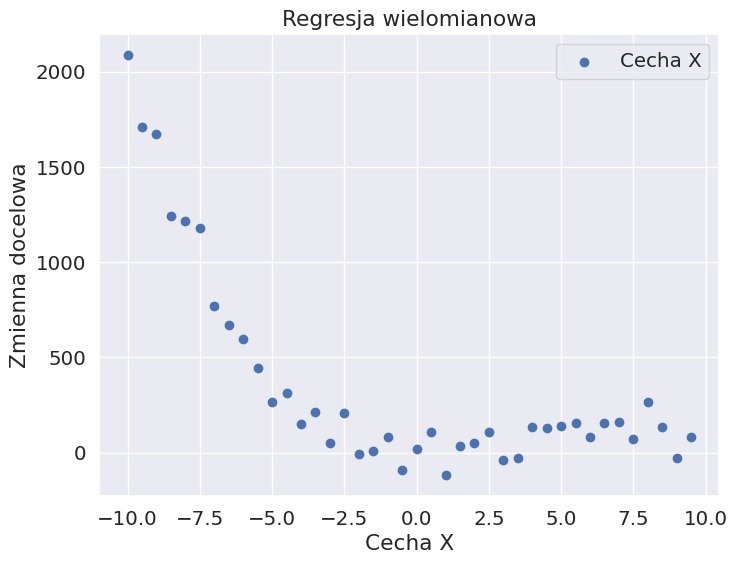

In [13]:
plt.figure(figsize=(8,6))
plt.title("Regresja wielomianowa")
plt.xlabel("Cecha X")
plt.ylabel("Zmienna docelowa")
plt.scatter(X, y, label="Cecha X")
plt.legend()
plt.show()

### <a name="3"></a> 4. Model liniowy

importowanie LinearRegression.


Podziału na zbiór testowy i treningowy nie ma, ze względu na naukę regresji wielomianowej

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)
y_pred_lin

array([1007.542038,  974.315165,  941.088292,  907.861418,  874.634545,
        841.407672,  808.180799,  774.953925,  741.727052,  708.500179,
        675.273306,  642.046433,  608.819559,  575.592686,  542.365813,
        509.13894 ,  475.912067,  442.685193,  409.45832 ,  376.231447,
        343.004574,  309.777701,  276.550827,  243.323954,  210.097081,
        176.870208,  143.643334,  110.416461,   77.189588,   43.962715,
         10.735842,  -22.491032,  -55.717905,  -88.944778, -122.171651,
       -155.398524, -188.625398, -221.852271, -255.079144, -288.306017])

Wizualizacja modelu liniowego

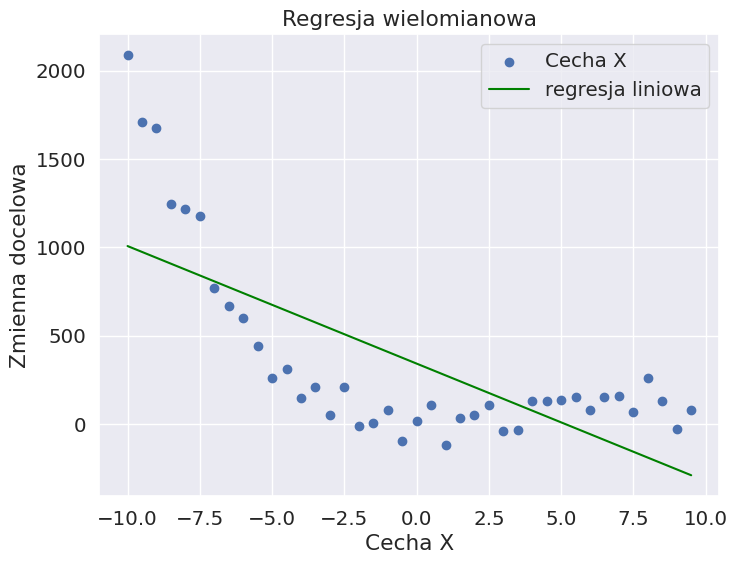

In [15]:
plt.figure(figsize=(8,6))
plt.title("Regresja wielomianowa")
plt.xlabel("Cecha X")
plt.ylabel("Zmienna docelowa")
plt.scatter(X, y, label="Cecha X")
plt.plot(X, y_pred_lin, c="green", label="regresja liniowa")
plt.legend()
plt.show()

Wskaźnik $R^2$

In [18]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.51234940886126

Model jest niedouczony (underfitting). Potrzebujemy zwiększyć złożność modelu dla naszego problemu.

Rozważmy model regresjii liniowej:
$$ Y = w_0 + w_1X_1$$

Dodając cechy wielomianowe otrzymujemy:
$$ Y = w_0 + w_1X_1+ w_2X_1^2$$

Wyboraźmy sobie teraz następujące podstawienie:
$$ Z = [1, X_1, X_1^2]$$

Wrzucając to z powrotem do modelu otrzymujemy prosty model liniowy:
$$ Y = w_0 + w_1Z_1 + w_2Z_2$$

### <a name="4"></a> 5. Ekstrakcja cech wielomianowych - stopień 2

X.ravel() - zwraca elementy serii


In [19]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head(20)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


Import PolynomialFeatures która przetransportuje tą jedną zmienną na wielomian,


degree to stopień

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

Dopasowanie do modelu

In [22]:
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

Wyświelenie rozmiaru X_poly

In [23]:
X_poly.shape

(40, 3)

Utworznie kolumn dla wielomianu i dodaje zawartości X_poly

In [26]:
df = pd.DataFrame(X_poly)
df.head()

,0,1,2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


Zmiana nazwa kolumn (1 - czyli wyraz wolny)

In [27]:
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


### <a name="5"></a> 6. Dopasowanie modelu


Zastosowanie na tych danych model liniowy

In [28]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

LinearRegression()

Predykcja

In [30]:
y_pred_2 = regressor_poly.predict(X_poly)

Wizualizacja Regresji wielomianowej stopnia 2

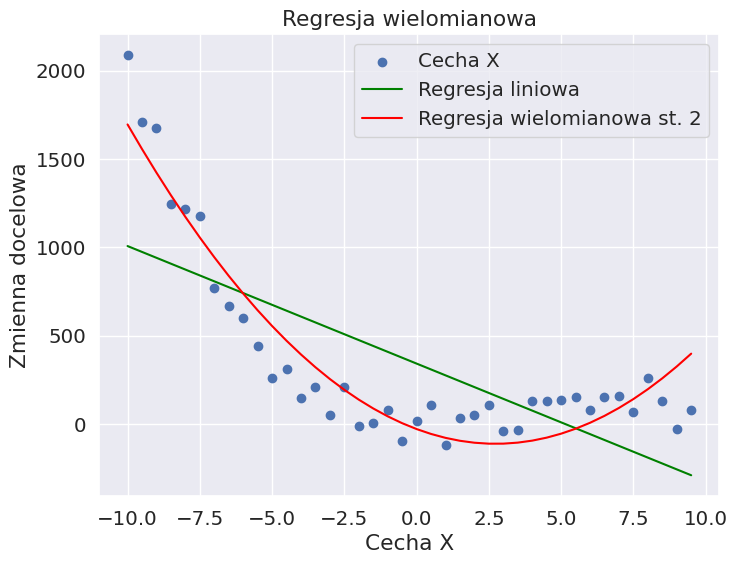

In [31]:
plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha X')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label="Cecha X")
plt.plot(X, y_pred_lin, c="green", label="Regresja liniowa")
plt.plot(X, y_pred_2, c="red", label="Regresja wielomianowa st. 2")
plt.legend()
plt.show()

Wskaźnik $R^2$

In [32]:
r2_score(y, y_pred_2)

0.894837546052117

Dopasowanie danych do modelu wynosi 89%

### <a name="6"></a> 7. Ekstrakcja cech wielomianowych - stopień 3


Wyświetlenie df i X

In [55]:
df.head()

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000


In [56]:
X

array([[-10. ],
       [ -9.5],
       [ -9. ],
       [ -8.5],
       [ -8. ],
       [ -7.5],
       [ -7. ],
       [ -6.5],
       [ -6. ],
       [ -5.5],
       [ -5. ],
       [ -4.5],
       [ -4. ],
       [ -3.5],
       [ -3. ],
       [ -2.5],
       [ -2. ],
       [ -1.5],
       [ -1. ],
       [ -0.5],
       [  0. ],
       [  0.5],
       [  1. ],
       [  1.5],
       [  2. ],
       [  2.5],
       [  3. ],
       [  3.5],
       [  4. ],
       [  4.5],
       [  5. ],
       [  5.5],
       [  6. ],
       [  6.5],
       [  7. ],
       [  7.5],
       [  8. ],
       [  8.5],
       [  9. ],
       [  9.5]])

Zwiększenie stopnia wielomianu do 3

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

Dopasowanie do modelu

In [58]:
X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

Wyświetlenie rozmiaru X_poly_3

In [59]:
X_poly_3.shape

(40, 4)

Dodanie kolumn 1, x, x^2, x^3 do ramki danych

In [60]:
df = pd.DataFrame(X_poly_3)
df.head()

,0,1,2,3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000


Zmiana nazwy kolumn

In [61]:
df.columns = ['1', 'x', 'x^2', 'x^3']
df.head(10)

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000
5,1.0,-7.5,56.25,-421.875
6,1.0,-7.0,49.00,-343.000
7,1.0,-6.5,42.25,-274.625
8,1.0,-6.0,36.00,-216.000
9,1.0,-5.5,30.25,-166.375


### <a name="7"></a> 8. Dopasowanie model

Zastosowanie na tych danych model liniowy

In [45]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

LinearRegression()

Predykcja

In [46]:
y_pred_3 = regressor_poly_3.predict(X_poly_3)

Wizualizacja wielomianowa predykcji st. 3


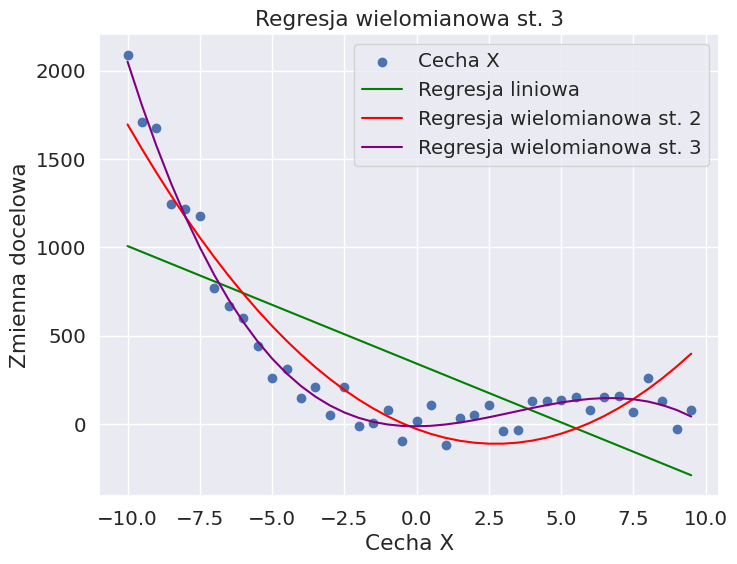

In [48]:
plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa st. 3')
plt.xlabel('Cecha X')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label="Cecha X")
plt.plot(X, y_pred_lin, c="green", label="Regresja liniowa")
plt.plot(X, y_pred_2, c="red", label="Regresja wielomianowa st. 2")
plt.plot(X, y_pred_3, c="purple", label="Regresja wielomianowa st. 3")
plt.legend()
plt.show()

Wskaźnik $R^2$

In [51]:
r2_score(y, y_pred_3)

0.9797148710728014

Dopasowanie do modelu wynosi 98%.

W celach powtórkowcyh wypróbujemy regresję wielomianową st. 4 i sprawdźmy czy dopasowanie zmiennych do modelu się polepszy czy pogroszy

### <a name="8"></a> 9. Ekstrakcja cech wielomianowych - stopień 4

In [53]:
df.head()

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000


In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly_4 = PolynomialFeatures(degree=4)

Dopasowanie do modelu

In [65]:
X_poly_4 = poly_4.fit_transform(X)
X_poly_4

array([[    1.    ,   -10.    ,   100.    , -1000.    , 10000.    ],
       [    1.    ,    -9.5   ,    90.25  ,  -857.375 ,  8145.0625],
       [    1.    ,    -9.    ,    81.    ,  -729.    ,  6561.    ],
       [    1.    ,    -8.5   ,    72.25  ,  -614.125 ,  5220.0625],
       [    1.    ,    -8.    ,    64.    ,  -512.    ,  4096.    ],
       [    1.    ,    -7.5   ,    56.25  ,  -421.875 ,  3164.0625],
       [    1.    ,    -7.    ,    49.    ,  -343.    ,  2401.    ],
       [    1.    ,    -6.5   ,    42.25  ,  -274.625 ,  1785.0625],
       [    1.    ,    -6.    ,    36.    ,  -216.    ,  1296.    ],
       [    1.    ,    -5.5   ,    30.25  ,  -166.375 ,   915.0625],
       [    1.    ,    -5.    ,    25.    ,  -125.    ,   625.    ],
       [    1.    ,    -4.5   ,    20.25  ,   -91.125 ,   410.0625],
       [    1.    ,    -4.    ,    16.    ,   -64.    ,   256.    ],
       [    1.    ,    -3.5   ,    12.25  ,   -42.875 ,   150.0625],
       [    1.    ,    -3.    ,   

Sprawdzenie rozmiaru X_poly_4

In [67]:
X_poly_4.shape

(40, 5)

Utworzenie ramki danych i zmienienie nazwa kolumn

In [69]:
df = pd.DataFrame(X_poly_4)
df.columns = ['1', 'x', 'x^2', 'x^3', 'x^4']
df.head(10)

,1,x,x^2,x^3,x^4
0,1.0,-10.0,100.00,-1000.000,10000.0000
1,1.0,-9.5,90.25,-857.375,8145.0625
2,1.0,-9.0,81.00,-729.000,6561.0000
3,1.0,-8.5,72.25,-614.125,5220.0625
4,1.0,-8.0,64.00,-512.000,4096.0000
5,1.0,-7.5,56.25,-421.875,3164.0625
6,1.0,-7.0,49.00,-343.000,2401.0000
7,1.0,-6.5,42.25,-274.625,1785.0625
8,1.0,-6.0,36.00,-216.000,1296.0000
9,1.0,-5.5,30.25,-166.375,915.0625


### <a name="9"></a> 10. Dopasowanie modelu

Dopasowanie liniowego modelu

In [70]:
regressor_poly_4 = LinearRegression()
regressor_poly_4.fit(X_poly_4, y)

LinearRegression()

Predykcja

In [72]:
y_pred_4 = regressor_poly_4.predict(X_poly_4)

Wizualizacja regresji wielomianowej st 4

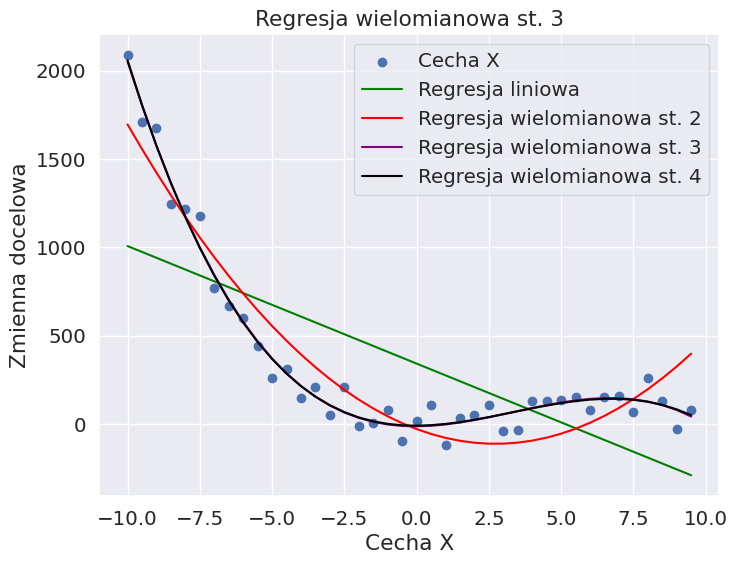

In [73]:
plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa st. 3')
plt.xlabel('Cecha X')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label="Cecha X")
plt.plot(X, y_pred_lin, c="green", label="Regresja liniowa")
plt.plot(X, y_pred_2, c="red", label="Regresja wielomianowa st. 2")
plt.plot(X, y_pred_3, c="purple", label="Regresja wielomianowa st. 3")
plt.plot(X, y_pred_4, c="black", label="Regresja wielomianowa st. 4")
plt.legend()
plt.show()

Wskaźnik $R^2$


In [74]:
r2_score(y, y_pred_4)

0.9797517931523185

Dopasowanie danych do modelu regresji wielomianowej 4 stopnia jest dosłowanie takie same jak dopasowanie modelu regresji wielomianowej stopnia 3

### <a name="10"></a> 11. Porównanie metryk

importowanie dwóch funkjci standardowe do oceny modeli regresyjnych MAE I MSE

In [77]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

Tworzenie obiektu DataFrame wyników

In [80]:
results = pd.DataFrame(data = {
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st.3', 'regresja wielomianowa st. 4'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3), r2_score(y, y_pred_4)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3), mae(y, y_pred_4)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3), mse(y, y_pred_4)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3)), np.sqrt(mse(y, y_pred_4))]
})

results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.512349,315.007524,140019.551346,374.191864
1,regresja wielomianowa st. 2,0.894838,149.393843,30195.389666,173.768207
2,regresja wielomianowa st.3,0.979715,63.456167,5824.487252,76.318328
3,regresja wielomianowa st. 4,0.979752,63.329140,5813.885782,76.248841


In [81]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [82]:
px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [84]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

In [85]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')